# Przewidywanie daty porodu: część II

Teraz postaramy się stworzyć model predykcyjny, który będzie miał za zadanie określić, w którym dniu ciąży urodzimy. Nasza zmienna **gestation** jest zmienną ciągłą, dlatego skorzystamy z regresji liniowej, SVR (Super Vector Regression) oraz sieci neuronowej MLPRegression.

In [1]:
#Import pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
from sklearn.metrics import r2_score

In [2]:
from collections import Counter

In [3]:
#Wczytywanie danych
babies=pd.read_csv("C:/Users/krxbk/Desktop/baby/babiesdata_model2.csv")

In [4]:
babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 20 columns):
Unnamed: 0    1037 non-null int64
gestation     1037 non-null int64
parity        1037 non-null int64
age           1037 non-null int64
ed            1037 non-null int64
dage          1037 non-null int64
ded           1037 non-null int64
marital       1037 non-null int64
inc           1037 non-null int64
smoke         1037 non-null int64
time          1037 non-null int64
number        1037 non-null int64
real_date     1037 non-null object
wt_kg         1037 non-null float64
race2         1037 non-null int64
ht_cm         1037 non-null float64
wt.1_kg       1037 non-null float64
drace2        1037 non-null int64
age_group     1037 non-null int64
born          1037 non-null int64
dtypes: float64(3), int64(16), object(1)
memory usage: 162.1+ KB


In [7]:
babies.head()

,gestation,parity,age,ed,dage,ded,marital,inc,smoke,time,number,real_date,wt_kg,race2,ht_cm,wt.1_kg,drace2,age_group,born
0,284,1,27,5,31,5,1,1,1,0,0,1961-11-12,3.360,4,157.48,45.400,4,3,1
1,282,2,33,5,38,5,1,4,1,0,0,1962-02-08,3.164,1,162.56,61.290,1,4,0
2,279,1,28,2,32,1,1,2,2,1,1,1962-04-26,3.584,1,162.56,52.210,1,3,0
3,282,1,23,5,24,5,1,1,2,1,5,1961-11-26,3.024,1,170.18,56.750,1,2,0
4,286,4,25,2,28,2,1,4,3,2,2,1962-08-01,3.808,1,157.48,42.222,1,2,1


In [6]:
#Pomijamy kolumnę Unnamed
babies=babies.iloc[:,1:20]

## Modele predykcyjne 1

Na podstawie naszych danych spróbujemy stworzyć modele predykcyjne, które będą przewidywały długość trwania ciąży.
Zmienną **y** będzie zmienna **gestation**, natomiast pozostałe zmienne (oprócz zmiennych **real_date**) będą zmiennymi objaśniającymi.
Na pierwszy ogień pójdzie regresja liniowa, następnie postaramy sie stworzyć model SVM oraz sieć neuronową.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
names1=["parity", "age", "ed", "dage", "ded", "marital", "inc", "smoke", "time", "number", "wt_kg", "race2", "ht_cm", "wt.1_kg",
        "drace2", "age_group"]

In [10]:
X=babies.loc[:,names1]

In [11]:
y=babies.loc[:,"gestation"]

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=123)

### Regresja liniowa 

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
reg.intercept_

252.32962689223618

In [17]:
pd.DataFrame(list(zip(reg.coef_, names1)))

,0,1
0,-0.757505,parity
1,-0.168790,age
2,0.106126,ed
3,0.111417,dage
4,-0.019360,ded
5,0.061634,marital
6,-0.100718,inc
7,0.827923,smoke
8,-0.322847,time
9,-0.093668,number


In [18]:
y_pred=reg.predict(X_test)

In [19]:
y_pred=y_pred.round()

In [20]:
pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}).head()

,Actual,Predicted
0,272,279.0
1,276,278.0
2,292,288.0
3,262,279.0
4,286,280.0


In [21]:
r2_score(y_test,y_pred)

0.12723009755834647

### SVM

In [22]:
from sklearn import svm

In [23]:
clf = svm.SVR()

In [24]:
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred_svm=clf.predict(X_test)

In [26]:
y_pred_svm=y_pred_svm.round()

In [27]:
r2_score(y_test,y_pred_svm)

-0.011022476149409766

In [28]:
pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_svm.flatten()}).head()

,Actual,Predicted
0,272,280.0
1,276,280.0
2,292,280.0
3,262,280.0
4,286,280.0


In [29]:
from sklearn.svm import LinearSVR

In [30]:
lin_clf=svm.LinearSVR()

In [31]:
lin_clf.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [32]:
y_pred_svm2=lin_clf.predict(X_test)

In [33]:
y_pred_svm2=y_pred_svm2.round()

In [34]:
r2_score(y_test,y_pred_svm2)

-1.053616665768339

In [35]:
pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_svm2.flatten()}).head()

,Actual,Predicted
0,272,285.0
1,276,268.0
2,292,305.0
3,262,266.0
4,286,257.0


### Neural network

In [36]:
from sklearn import neural_network

In [37]:
from sklearn.neural_network import MLPRegressor

In [38]:
mlp_reg=neural_network.MLPRegressor()

In [39]:
mlp_reg.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [40]:
y_pred_mlp=mlp_reg.predict(X_test)

In [41]:
y_pred_mlp=y_pred_mlp.round()

In [42]:
pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_mlp.flatten()}).head()

,Actual,Predicted
0,272,308.0
1,276,285.0
2,292,310.0
3,262,254.0
4,286,245.0


In [43]:
r2_score(y_test,y_pred_mlp)

-4.044884924271007

### Podsumowanie 

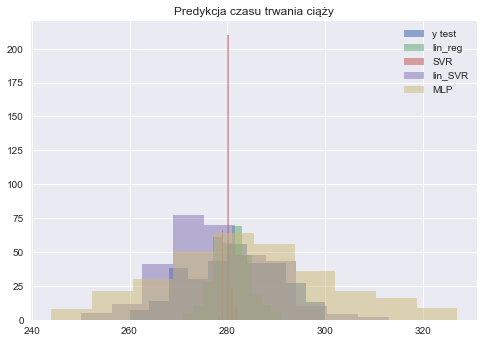

In [47]:
plt.hist(y_test, alpha=0.6, label="y test")
plt.hist(y_pred, alpha=0.5, label="lin_reg")
plt.hist(y_pred_svm, alpha=0.5, label="SVR")
plt.hist(y_pred_svm2, alpha=0.5, label="lin_SVR")
plt.hist(y_pred_mlp, alpha=0.5, label="MLP")
plt.legend(loc='upper right')
plt.title("Predykcja czasu trwania ciąży")
plt.show()

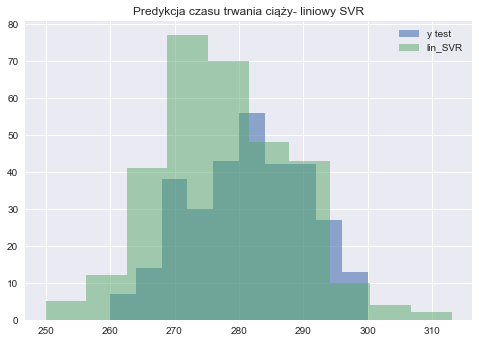

In [48]:
plt.hist(y_test, alpha=0.6, label="y test")
plt.hist(y_pred_svm2, alpha=0.5, label="lin_SVR")
plt.legend(loc='upper right')
plt.title("Predykcja czasu trwania ciąży- liniowy SVR")
plt.show()

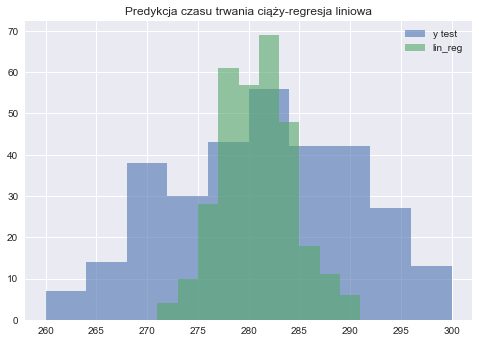

In [49]:
plt.hist(y_test, alpha=0.6, label="y test")
plt.hist(y_pred, alpha=0.6, label="lin_reg")
plt.legend(loc='upper right')
plt.title("Predykcja czasu trwania ciąży-regresja liniowa")
plt.show()

In [46]:
print("Współczynnki determinacji dla regresji liniowej wynosi ", r2_score(y_test,y_pred))
print("Współczynnki determinacji dla SVR wynosi ", r2_score(y_test,y_pred_svm))
print("Współczynnki determinacji dla liniowej SVR wynosi ", r2_score(y_test,y_pred_svm2))
print("Współczynnki determinacji dla sieci neuronowej wynosi ", r2_score(y_test,y_pred_mlp))

Współczynnki determinacji dla regresji liniowej wynosi  0.127230097558
Współczynnki determinacji dla SVR wynosi  -0.0110224761494
Współczynnki determinacji dla liniowej SVR wynosi  -1.05361666577
Współczynnki determinacji dla sieci neuronowej wynosi  -4.04488492427


Zarówno dla modeli SVR oraz MLR współczynnik determinacji przyjął ujemne wartości. Dla regreji liniowej ma wartość 0,127, co oznacza, że dla 12,7% przypadków wynik był dokładnie przewidziany. Oprócz tego, na wykresie widać, że modele SVR zawiodły, ponieważ w pierwszym przypadku model wyznaczył głównie wartość 280, natomiast model liniowy SVR przewidział, że większość ciąż zakończą się przed terminem.
Być może jest to spowodowane tym, że mamy dosyć duży przedział wartości dla zmiennej **gestation**.

In [50]:
babies["gestation"].describe()

count    1037.000000
mean      280.347155
std         9.047868
min       260.000000
25%       274.000000
50%       280.000000
75%       287.000000
max       300.000000
Name: gestation, dtype: float64

## Klasyfikacja

Skoro modele liniowe zawiodły spróbujemy podejść do tego zagadnienia pod kątem klasyfikacji. 
W zbiorze mamy utworzoną zmienną **born**, która przyjmuje trzy wartości:
* -1: dla kobiet, które urodziły między 266 a 277 dniem ciąży; "przed terminem",
* 0: dla kobiet, które urodziły między 278 a 282 dniem ciąży; "w terminie",
* 1: dla kobiet, które urodziły między 283 a 294 dniem ciąży; "po terminie".


In [55]:
y2=babies["born"]

In [56]:
Counter(y2)

Counter({-1: 401, 0: 214, 1: 422})

Nasze klasy nie są tej samej wielkości- klasa 0 ma 2 razy mniej obserwacji niż pozostałe klasy. W takim wypadku należy w modelu predykcyjnym dodać wagi; w przeciwnym przypadku model prawdopodobnie w ogóle nie będzie przewidywał klasy 0.

In [58]:
X_train, X_test, y_train2, y_test2=train_test_split(X,y2,test_size=0.4, random_state=123)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train2)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_pred = logreg.predict(X_test)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred))

             precision    recall  f1-score   support

         -1       0.45      0.63      0.52       150
          0       0.13      0.02      0.04        85
          1       0.55      0.57      0.56       180

avg / total       0.43      0.48      0.44       415



In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test2, y_pred)

array([[ 95,   6,  49],
       [ 48,   2,  35],
       [ 70,   7, 103]])

Przy domyślnych ustawieniach regresji logistycznej, model nie przewiduje nam w ogóle klasy 0- porody w terminie. Spróbujmy nadać wagi zmiennej born i zobaczmy, czy wpłynie to na wyniki.

In [68]:
# Klasyfikator One vs Rest
from sklearn.multiclass import OneVsRestClassifier

In [69]:
from sklearn.svm import LinearSVC

In [74]:
ovr=OneVsRestClassifier(LinearSVC(random_state=0))

In [75]:
ovr.fit(X_train, y_train2)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [76]:
y_pred_ovr = ovr.predict(X_test)

In [77]:
print(classification_report(y_test2, y_pred_ovr))

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       150
          0       0.20      1.00      0.34        85
          1       0.00      0.00      0.00       180

avg / total       0.04      0.20      0.07       415



C:\Users\krxbk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ten model zaklasyfikował nam wszystkie obserwacje jako wartości 0-słabo...

In [78]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

In [79]:
model = SVC(class_weight='balanced')

In [80]:
ovo = OneVsOneClassifier(model)

In [81]:
ovo.fit(X_train, y_train2)

OneVsOneClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [82]:
yhat = ovo.predict(X_test)

In [83]:
print(classification_report(y_test2, yhat))

             precision    recall  f1-score   support

         -1       0.39      0.69      0.50       150
          0       0.24      0.09      0.14        85
          1       0.44      0.28      0.34       180

avg / total       0.38      0.39      0.36       415



In [85]:
confusion_matrix(y_test2, yhat)

array([[104,  10,  36],
       [ 50,   8,  27],
       [115,  15,  50]])

W tym wypadku już jest lepiej, ale regresja logistyczna osiągnęła lepsze wyniki predykcji.

## Feature importance

In [87]:
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.14305
Feature: 1, Score: 0.11217
Feature: 2, Score: -0.00184
Feature: 3, Score: -0.04366
Feature: 4, Score: 0.04045
Feature: 5, Score: 0.45843
Feature: 6, Score: 0.03326
Feature: 7, Score: -0.60975
Feature: 8, Score: 0.30962
Feature: 9, Score: 0.05434
Feature: 10, Score: -1.40630
Feature: 11, Score: 0.09435
Feature: 12, Score: 0.01486
Feature: 13, Score: -0.00160
Feature: 14, Score: 0.03152
Feature: 15, Score: -0.40111


In [89]:
print(X_train.columns)

Index(['parity', 'age', 'ed', 'dage', 'ded', 'marital', 'inc', 'smoke', 'time',
       'number', 'wt_kg', 'race2', 'ht_cm', 'wt.1_kg', 'drace2', 'age_group'],
      dtype='object')


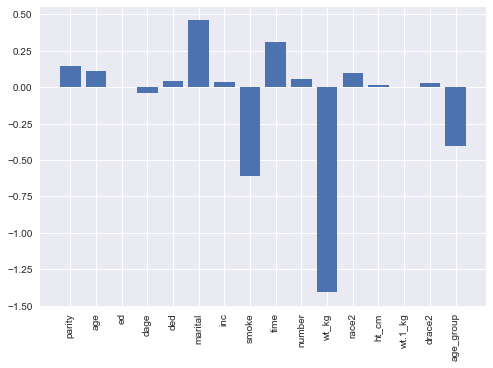

In [91]:
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],['parity', 'age', 'ed', 'dage', 'ded', 'marital', 'inc', 'smoke', 'time',
       'number', 'wt_kg', 'race2', 'ht_cm', 'wt.1_kg', 'drace2', 'age_group'], rotation='vertical')
plt.show()

Na wykresie widać, że zmienne **ed** oraz **wt.1_kg** są w modelu praktycznie nieistotne. Zobaczmy, czy wyniki modelu zmienią się, jeżeli wyrzucimy te zmienne.

In [93]:
names2=["parity", "age", "dage", "ded","marital", "inc", "smoke", "time", "number", "wt_kg", "race2", "ht_cm", "drace2", "age_group"]

In [94]:
X2=babies.loc[:,names2]

In [95]:
X_train, X_test, y_train, y_test=train_test_split(X2,y2,test_size=0.4, random_state=123)

In [100]:
logreg2 = LogisticRegression(class_weight='balanced')
logreg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [101]:
y_pred_lr=logreg2.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred_lr))

             precision    recall  f1-score   support

         -1       0.44      0.62      0.51       150
          0       0.09      0.01      0.02        85
          1       0.56      0.59      0.58       180

avg / total       0.42      0.48      0.44       415



In [104]:
# wyniki z pierwszego modelu
print(classification_report(y_test2, y_pred))

             precision    recall  f1-score   support

         -1       0.45      0.63      0.52       150
          0       0.13      0.02      0.04        85
          1       0.55      0.57      0.56       180

avg / total       0.43      0.48      0.44       415



Po usunięciu tych **ed** oraz **wt.1_kg** wyniki trochę się pogorszyły.

## Podsumowanie 

Ze wszystkich wykonanych eksperymentów regresja logistyczna dała nam najlepsze wyniki. Na podstawie tego modelu postaram się stworzyć aplikację, która będzie przewidywała datę porodu.